1️⃣ : Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

2️⃣ : Reading The Dataset

In [4]:
new_Benifit_cost=pd.read_csv(r"C:\Users\hp\cleaned_Benifitcost.csv")

In [5]:
new_Benifit_cost.head(2)

,BenefitName,BusinessYear,CoinsInnTier1,CopayInnTier1,PlanId,SourceName,StateCode
0,Routine Dental Services (Adult),2014,20,0,21989AK0010001-00,HIOS,AK
1,Dental Check-Up For Children,2014,20,0,21989AK0010001-00,HIOS,AK


In [6]:
new_Benifit_cost.columns

Index(['BenefitName', 'BusinessYear', 'CoinsInnTier1', 'CopayInnTier1',
       'PlanId', 'SourceName', 'StateCode'],
      dtype='object')

🔹 Finding out Total Number of Rows and Columns

In [8]:
new_Benifit_cost.shape

(5048408, 7)

🔹 Extracting First 2 Rows from Benefit Cost sharing data set

In [10]:
new_Benifit_cost.head(2)

,BenefitName,BusinessYear,CoinsInnTier1,CopayInnTier1,PlanId,SourceName,StateCode
0,Routine Dental Services (Adult),2014,20,0,21989AK0010001-00,HIOS,AK
1,Dental Check-Up For Children,2014,20,0,21989AK0010001-00,HIOS,AK


🔹 Extracting Last 2 Rows from Benefit Cost sharing data set

In [12]:
new_Benifit_cost.tail(2)

,BenefitName,BusinessYear,CoinsInnTier1,CopayInnTier1,PlanId,SourceName,StateCode
5048406,Major Dental Care - Adult,2016,0,0,96480WV0110003-00,SERFF,WV
5048407,Accidental Dental,2016,0,0,96480WV0110003-00,SERFF,WV


🔹 Ensuring there is No Null Value in this Cleaned Health-Care Dataset

In [14]:
new_Benifit_cost.isnull().sum()

BenefitName      0
BusinessYear     0
CoinsInnTier1    0
CopayInnTier1    0
PlanId           0
SourceName       0
StateCode        0
dtype: int64

🔹 Checking for Any Duplicated Value left after Data-Clening

In [16]:
new_Benifit_cost.duplicated().sum()

224

In [17]:
new_Benifit_cost.drop_duplicates(inplace=True)

In [18]:
new_Benifit_cost.duplicated().sum()

0

🔹 Over-Looking the Benefit Cost Sharing Dataset with Derived Column

In [20]:
new_Benifit_cost.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5048184 entries, 0 to 5048407
Data columns (total 7 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   BenefitName    object
 1   BusinessYear   int64 
 2   CoinsInnTier1  int64 
 3   CopayInnTier1  int64 
 4   PlanId         object
 5   SourceName     object
 6   StateCode      object
dtypes: int64(3), object(4)
memory usage: 308.1+ MB


🔹 Statistical Summary of all Numeric Columns In this Cleaned Dataset

In [22]:
new_Benifit_cost.describe()

,BusinessYear,CoinsInnTier1,CopayInnTier1
count,5.048184e+06,5.048184e+06,5.048184e+06
mean,2.015127e+03,9.232244e+00,1.317598e+01
std,7.563562e-01,1.470513e+01,7.715727e+01
min,2.014000e+03,0.000000e+00,0.000000e+00
25%,2.015000e+03,0.000000e+00,0.000000e+00
50%,2.015000e+03,0.000000e+00,0.000000e+00
75%,2.016000e+03,2.000000e+01,0.000000e+00
max,2.016000e+03,1.100000e+02,6.600000e+03


🔹 Statistical Summary of Descriptive Columns In this Cleaned Dataset

In [24]:
new_Benifit_cost.describe(include = 'object')

,BenefitName,PlanId,SourceName,StateCode
count,5048184,5048184,5048184,5048184
unique,792,52394,3,39
top,Routine Dental Services (Adult),31274WV0310001-03,HIOS,WI
freq,77353,291,3049037,512587


🟥 Visualizing  Analyze which benefit type topping the chart in a given business year

In [26]:
new_Benifit_cost[["BusinessYear","BenefitName"]].groupby('BusinessYear').describe()

BenefitName                                               
                   count unique                              top   freq
BusinessYear                                                           
2014             1164732    479  Routine Dental Services (Adult)  18719
2015             2079240    497                Accidental Dental  31253
2016             1804212    393  Routine Dental Services (Adult)  27381

In [34]:
new_Benifit_cost['BenefitName'].describe()

count                             5048184
unique                                792
top       Routine Dental Services (Adult)
freq                                77353
Name: BenefitName, dtype: object

In [36]:
## Analyze benefit penetration statewise

C:\Users\hp\AppData\Local\Temp\ipykernel_6280\1352159406.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(Unique_State, rotation='horizontal', fontsize='small')


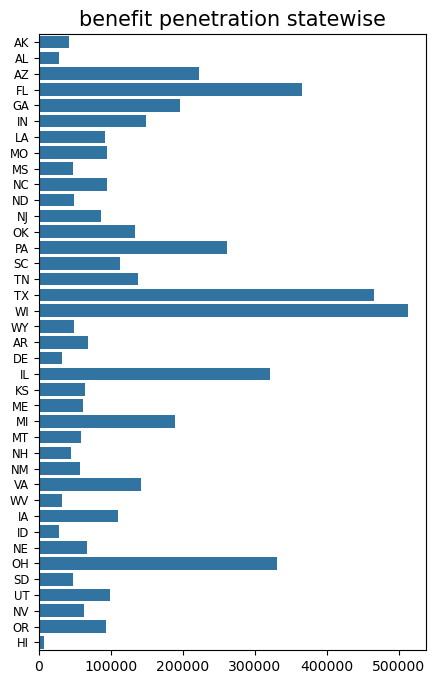

In [38]:
new_Benifit_cost[["StateCode","BenefitName"]].groupby('StateCode').count().sort_values("BenefitName")
Unique_State = new_Benifit_cost.StateCode.unique()
benefitarray = []

for state in Unique_State:
    state_benefit =  len(new_Benifit_cost[new_Benifit_cost["StateCode"] == state])    
    benefitarray.append(state_benefit)   
f, ax = plt.subplots(figsize=(5, 8)) 
plt.title('benefit penetration statewise', fontsize=15)
ax.set_yticklabels(Unique_State, rotation='horizontal', fontsize='small')
g = sns.barplot(y = Unique_State,x=benefitarray)
plt.show()


In [42]:
new_Benifit_cost[["BusinessYear","BenefitName"]].groupby('BusinessYear').describe()

BenefitName                                               
                   count unique                              top   freq
BusinessYear                                                           
2014             1164732    479  Routine Dental Services (Adult)  18719
2015             2079240    497                Accidental Dental  31253
2016             1804212    393  Routine Dental Services (Adult)  27381

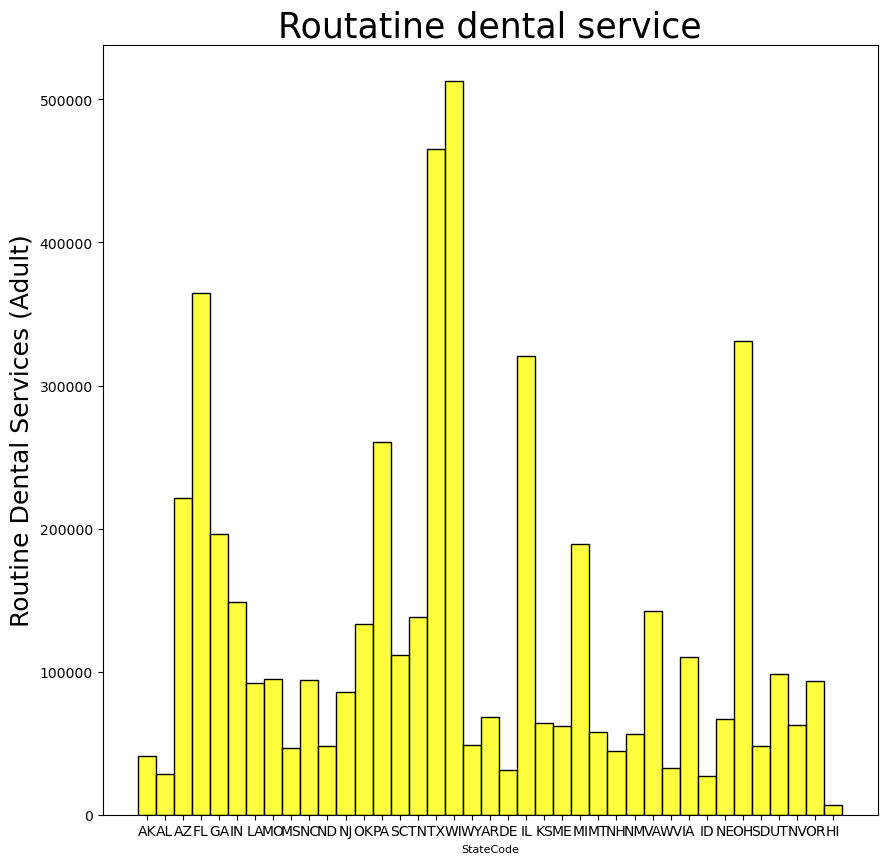

In [64]:
plt.figure(figsize=(10, 10))
sns.histplot(new_Benifit_cost.StateCode,color='yellow')
plt.title('Routatine dental service', fontsize=25)
plt.xlabel('StateCode',fontsize=8)
plt.ylabel('Routine Dental Services (Adult)', fontsize=18)
plt.show()